In [1]:
### Imports and data ###

#Imports
import tensorflow as tf
import keras as k
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from keras.optimizers import SGD
import matplotlib.pyplot as plt
import numpy as np

import datetime as dt
import matplotlib as style
import pandas_datareader.data as web
from sklearn.preprocessing import MinMaxScaler

#Get Data from yahoo

start = dt.datetime(2000,1,1)
end = dt.datetime(2016,12,31)
shift = 100
df = web.DataReader('AAPL', 'yahoo', start, end)[['Close']]
df =df.values.reshape(len(df), 1)
plt.plot(df)
plt.show()

Using TensorFlow backend.


<Figure size 640x480 with 1 Axes>

In [2]:
scaler = MinMaxScaler(feature_range=(0,1))
df = scaler.fit_transform(df)

In [3]:
data_split = 0.8
train_data = df[:int(len(df)*data_split)]
test_data = df[int(len(df)*data_split):]

In [4]:
def create_ts(ds, inLen, outLen):
    X, Y = [], []
    totLen = inLen+outLen
    for i in range(len(ds)-totLen-1):
        X.append(ds[i:(i+inLen), 0])
        Y.append(ds[(i+inLen):(i+totLen), 0])
    return np.array(X), np.array(Y)

in_series = 100
out_series = 22

x_train, y_train = create_ts(train_data, in_series, out_series)
x_test, y_test = create_ts(test_data, in_series, out_series)

In [5]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3298, 100, 1)
(3298, 22)
(733, 100, 1)
(733, 22)


In [6]:
model = Sequential()

model.add(LSTM(30, input_shape=(in_series, 1), activation='relu', return_sequences=True))
model.add(LSTM(15, activation='relu'))
model.add(Dense(22, activation='linear'))
model.compile(loss='mse', optimizer='adam')

model2 = Sequential()

model2.add(LSTM(4, input_shape=(in_series, 1)))
model2.add(Dense(22))
model2.compile(loss='mse', optimizer='adam')

In [7]:
model.fit(x_train, y_train, epochs=25, batch_size=32)
model2.fit(x_train, y_train, epochs=25, batch_size=32)

Epoch 1/25
3298/3298 [==============================] - 6s 2ms/step - loss: 0.0376
Epoch 2/25
3298/3298 [==============================] - 5s 2ms/step - loss: 0.0059
Epoch 3/25
3298/3298 [==============================] - 5s 2ms/step - loss: 7.8952e-04
Epoch 4/25
3298/3298 [==============================] - 5s 2ms/step - loss: 5.4218e-04
Epoch 5/25
3298/3298 [==============================] - 5s 2ms/step - loss: 4.9701e-04
Epoch 6/25
3298/3298 [==============================] - 6s 2ms/step - loss: 4.7533e-04
Epoch 7/25
3298/3298 [==============================] - 5s 2ms/step - loss: 4.5114e-04
Epoch 8/25
3298/3298 [==============================] - 5s 2ms/step - loss: 4.2926e-04
Epoch 9/25
3298/3298 [==============================] - 5s 2ms/step - loss: 4.1966e-04
Epoch 10/25
3298/3298 [==============================] - 5s 2ms/step - loss: 4.0152e-04
Epoch 11/25
3298/3298 [==============================] - 5s 2ms/step - loss: 3.9503e-04
Epoch 12/25
3298/3298 [==========================

In [8]:
pred1 = model.predict(x_test)
pred2 = model2.predict(x_test)
pred1 = scaler.inverse_transform(pred1)
pred2 = scaler.inverse_transform(pred2)
y_test = scaler.inverse_transform(y_test)

In [9]:
print(pred1[50])
print(y_test[50])
print(pred1[50]-y_test[50])

[76.00662  75.65797  76.33334  75.80604  75.63681  75.19221  75.39058
 75.96483  75.48859  75.56715  76.00835  75.51947  75.124825 76.11641
 75.8203   75.78669  75.93025  76.00475  75.32234  75.49738  75.5145
 76.35699 ]
[75.2485733  75.91428375 75.89428711 75.52857208 76.12428284 77.02714539
 77.85571289 77.11142731 76.77999878 76.69428253 76.67713928 77.37857056
 77.50714111 76.97000122 75.97428894 74.78142548 74.77714539 75.76000214
 74.7828598  74.23000336 74.52571106 73.99428558]
[ 0.75804901 -0.25631714  0.4390564   0.27746582 -0.48747253 -1.83493805
 -2.46513367 -1.14659882 -1.29141235 -1.12713623 -0.66879272 -1.85910034
 -2.38231659 -0.85359192 -0.1539917   1.00526428  1.15310669  0.24475098
  0.53948212  1.26737976  0.98879242  2.36270142]


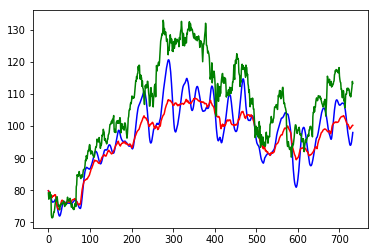

In [10]:
plt.plot(pred1[:,10], color='blue')
plt.plot(pred2[:,10], color='red')
plt.plot(y_test[:,10], color='green')
plt.show()